# Prueba para joint 7 con movimiento sinusoidal
## Coding
### Importando librerías


In [56]:
#importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

## Plotting data

### Muestra de data para una ventana de 3000 datos

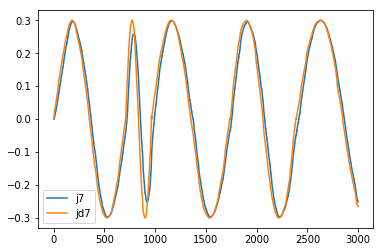

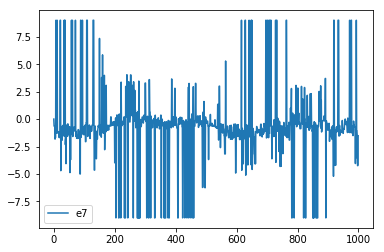

In [67]:
df = pd.read_csv('training_data_joint7.csv')
df_eval = pd.read_csv('evaluation_data_joint7.csv')
df_val = pd.read_csv('validation_data_joint7.csv')
fig1 = plt.figure()
df.j7[0:3000].plot()
df.jd7[0:3000].plot(); plt.legend(loc='best')
fig2 = plt.figure(); df.e7[0:1000].plot(); plt.legend(loc='best')

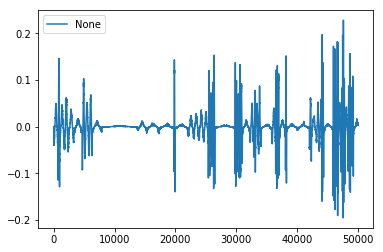

In [58]:
delta_j7 = df.j7 - df.jd7
fig3 = plt.figure(); delta_j7.plot(); plt.legend(loc='best')
#delta_j7.head()
df['delta_j7'] = delta_j7

### Plotting delta rad vs effort

<Figure size 432x288 with 0 Axes>

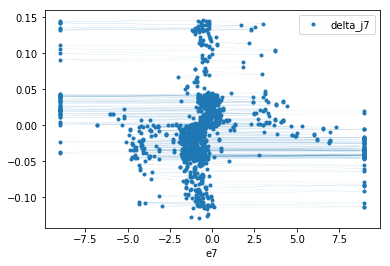

In [59]:
fig4 = plt.figure(); df[500:2000].plot(x = 'e7', y = 'delta_j7', marker='.',lw=0.05); plt.legend(loc='best')

### Prueba de validación para modelo FFNN
#### Solo Neuronas Lineales (model1)
Se utiliza un modelo de 1 input layer de 15 neuronas lineales, 2 hidden layers de 15 neuronas lineales y 1 output layer de 2 neuronas lineales.  

In [60]:
# Generating model
model1 = Sequential()
model1.add(Dense(units=10, activation='linear', input_dim=2))
model1.add(Dense(units=10, activation='linear'))
model1.add(Dense(units=10, activation='linear'))
model1.add(Dense(units=1, activation='linear'))

model1.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

(number_training_data, _) = df.shape
q_tmp = df.j7.values.reshape(number_training_data,1)
T_tmp = df.e7.values.reshape(number_training_data,1)
qd_tmp = df.jd7
x_train = np.concatenate([q_tmp, T_tmp], axis =1)
y_train = qd_tmp.values.reshape(number_training_data,1)
#print x_train.shape
#print y_train.shape


#### Feeding data

In [61]:
model1.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
50001/50001 [==============================] - 9s 177us/step - loss: 0.0017 - acc: 2.0000e-05
Epoch 2/10
50001/50001 [==============================] - 8s 163us/step - loss: 0.0012 - acc: 2.0000e-05
Epoch 3/10
50001/50001 [==============================] - 8s 165us/step - loss: 0.0011 - acc: 2.0000e-05
Epoch 4/10
50001/50001 [==============================] - 8s 166us/step - loss: 0.0011 - acc: 2.0000e-05
Epoch 5/10
50001/50001 [==============================] - 8s 154us/step - loss: 0.0011 - acc: 2.0000e-05
Epoch 6/10
50001/50001 [==============================] - 9s 172us/step - loss: 0.0011 - acc: 2.0000e-05
Epoch 7/10
50001/50001 [==============================] - 9s 180us/step - loss: 0.0011 - acc: 2.0000e-05
Epoch 8/10
50001/50001 [==============================] - 9s 183us/step - loss: 0.0011 - acc: 2.0000e-05
Epoch 9/10
50001/50001 [==============================] - 8s 169us/step - loss: 0.0011 - acc: 2.0000e-05
Epoch 10/10
50001/50001 [==============================

In [64]:
(number_evaluation_data, _) = df_eval.shape
q_tmp = df_eval.j7.values.reshape(number_evaluation_data,1)
T_tmp = df_eval.e7.values.reshape(number_evaluation_data,1)
qd_tmp = df_eval.jd7
x_eval = np.concatenate([q_tmp, T_tmp], axis =1)
y_eval = qd_tmp.values.reshape(number_evaluation_data,1)

In [66]:
model1.evaluate(x_eval, y_eval, batch_size=50)

10001/10001 [==============================] - 1s 147us/step


[0.0011660861194997207, 9.998999876494932e-05]

In [68]:
(number_validation_data, _) = df_val.shape
q_tmp = df_val.j7.values.reshape(number_validation_data,1)
T_tmp = df_val.e7.values.reshape(number_validation_data,1)
qd_tmp = df_val.jd7
x_val = np.concatenate([q_tmp, T_tmp], axis =1)
y_val = qd_tmp.values.reshape(number_validation_data,1)

In [72]:
y_pred = model1.predict(x_val)

In [75]:
df_val['y_pred'] = y_pred

<Figure size 432x288 with 0 Axes>

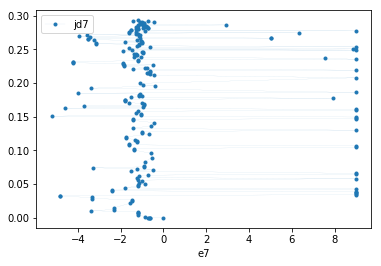

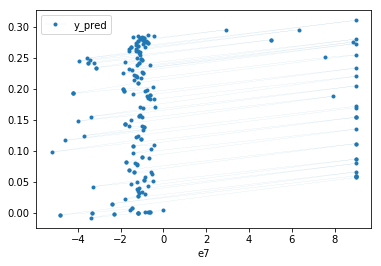

In [78]:
fig5 = plt.figure(); df_val[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.05)
df_val[0:200].plot(x = 'e7', y = 'y_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

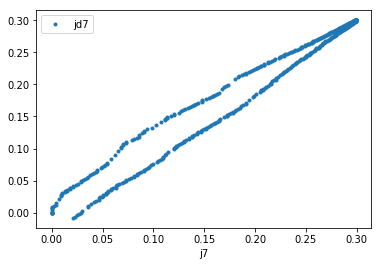

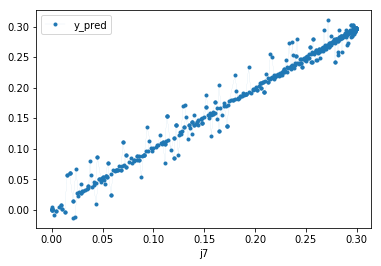

In [82]:
fig6 = plt.figure(); df_val[0:500].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[0:500].plot(x = 'j7', y = 'y_pred', marker='.',lw=0.05); plt.legend(loc='best')